In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('India_GDP_1960-2022.csv')

In [3]:
df

,Unnamed: 0,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,NaN,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
1,0.0,2021,3173.4,182160,8.95
2,1.0,2020,2667.69,154640,-6.6
3,2.0,2019,2831.55,165760,3.74
4,3.0,2018,2702.93,159840,6.45
...,...,...,...,...,...
58,57.0,1964,56.48,9280,7.45
59,58.0,1963,48.42,8080,5.99
60,59.0,1962,42.16,7200,2.93
61,60.0,1961,39.23,6800,3.72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     62 non-null     float64
 1   India GDP - Historical Data    63 non-null     object 
 2   India GDP - Historical Data.1  63 non-null     object 
 3   India GDP - Historical Data.2  63 non-null     object 
 4   India GDP - Historical Data.3  63 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.6+ KB


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df

,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
1,2021,3173.4,182160,8.95
2,2020,2667.69,154640,-6.6
3,2019,2831.55,165760,3.74
4,2018,2702.93,159840,6.45
...,...,...,...,...
58,1964,56.48,9280,7.45
59,1963,48.42,8080,5.99
60,1962,42.16,7200,2.93
61,1961,39.23,6800,3.72


In [7]:
df.rename(columns = {'India GDP - Historical Data':'year'}, inplace = True)
df.rename(columns = {'India GDP - Historical Data.1':'GDP$'}, inplace = True)
df.rename(columns = {'India GDP - Historical Data.2':'Per_capita$'}, inplace = True)
df.rename(columns = {'India GDP - Historical Data.3':'Growth%'}, inplace = True)
df

,year,GDP$,Per_capita$,Growth%
0,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
1,2021,3173.4,182160,8.95
2,2020,2667.69,154640,-6.6
3,2019,2831.55,165760,3.74
4,2018,2702.93,159840,6.45
...,...,...,...,...
58,1964,56.48,9280,7.45
59,1963,48.42,8080,5.99
60,1962,42.16,7200,2.93
61,1961,39.23,6800,3.72


In [8]:
df = df.iloc[1: , :]
df.reset_index(inplace = True)
df

,index,year,GDP$,Per_capita$,Growth%
0,1,2021,3173.4,182160,8.95
1,2,2020,2667.69,154640,-6.6
2,3,2019,2831.55,165760,3.74
3,4,2018,2702.93,159840,6.45
4,5,2017,2651.47,158480,6.8
...,...,...,...,...,...
57,58,1964,56.48,9280,7.45
58,59,1963,48.42,8080,5.99
59,60,1962,42.16,7200,2.93
60,61,1961,39.23,6800,3.72


In [12]:
df['GDP$'] = df['GDP$'].str.replace('$', '')
df['GDP$'] = df['GDP$'].str.replace('B', '')
df['GDP$'] = df['GDP$'].str.replace(',', '')
df['Per_capita$'] = df['Per_capita$'].str.replace('$', '')
df['Per_capita$'] = df['Per_capita$'].str.replace(',', '')
df['Growth%'] = df['Growth%'].str.replace('%', '')

df

C:\Users\HP\AppData\Local\Temp\ipykernel_6124\3434355690.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['GDP$'] = df['GDP$'].str.replace('$', '')
C:\Users\HP\AppData\Local\Temp\ipykernel_6124\3434355690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GDP$'] = df['GDP$'].str.replace('$', '')
C:\Users\HP\AppData\Local\Temp\ipykernel_6124\3434355690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,index,year,GDP$,Per_capita$,Growth%
0,1,2021,3173.4,182160,8.95
1,2,2020,2667.69,154640,-6.6
2,3,2019,2831.55,165760,3.74
3,4,2018,2702.93,159840,6.45
4,5,2017,2651.47,158480,6.8
...,...,...,...,...,...
57,58,1964,56.48,9280,7.45
58,59,1963,48.42,8080,5.99
59,60,1962,42.16,7200,2.93
60,61,1961,39.23,6800,3.72


In [14]:
df.sample(15)

,index,year,GDP$,Per_capita$,Growth%
32,33,1989,296.04,27680,5.95
38,39,1983,218.26,23280,7.29
28,29,1993,279.3,24080,4.75
5,6,2016,2294.8,138640,8.26
19,20,2002,514.94,37680,3.8
17,18,2004,709.15,50240,7.92
16,17,2005,820.38,57200,7.92
40,41,1981,193.49,21600,6.01
43,44,1978,137.3,16480,5.71
58,59,1963,48.42,8080,5.99


In [15]:
df['GDP$'] = df['GDP$'].astype(float)
df['Per_capita$'] = df['Per_capita$'].astype(float)
df['Growth%'] = df['Growth%'].astype(float)

<AxesSubplot:xlabel='year', ylabel='Growth%'>

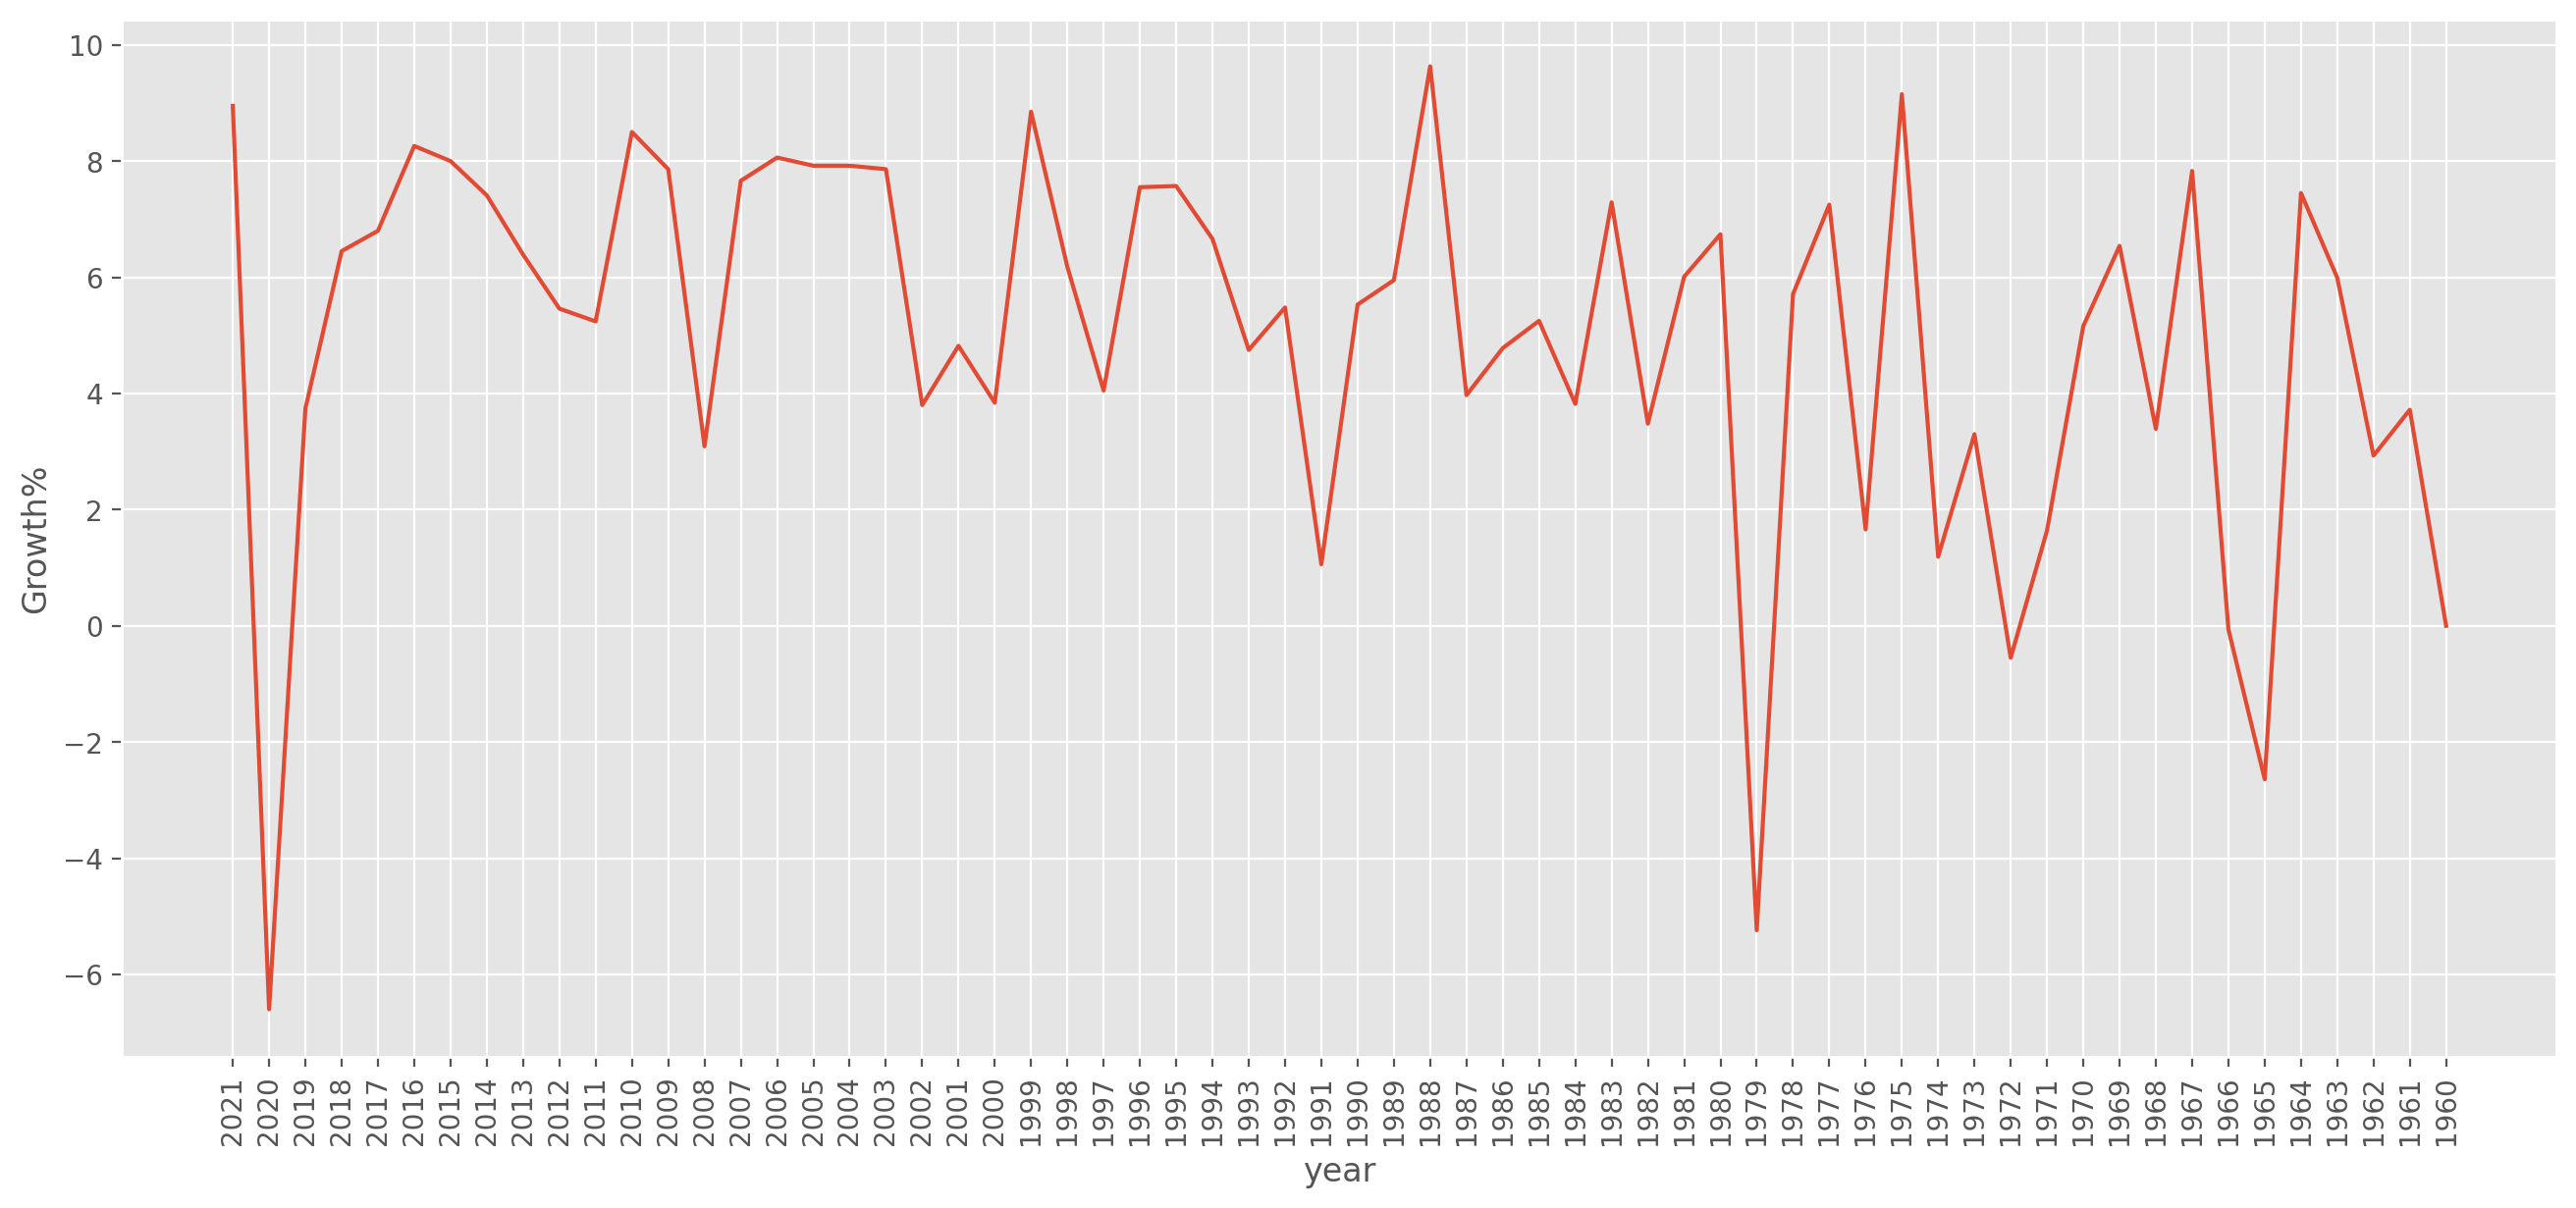

In [21]:
plt.figure(figsize = (16,7), dpi = 200)
plt.xticks(rotation = 90)
sns.lineplot(y = df['Growth%'], x = df.year)

<AxesSubplot:xlabel='year', ylabel='GDP$'>

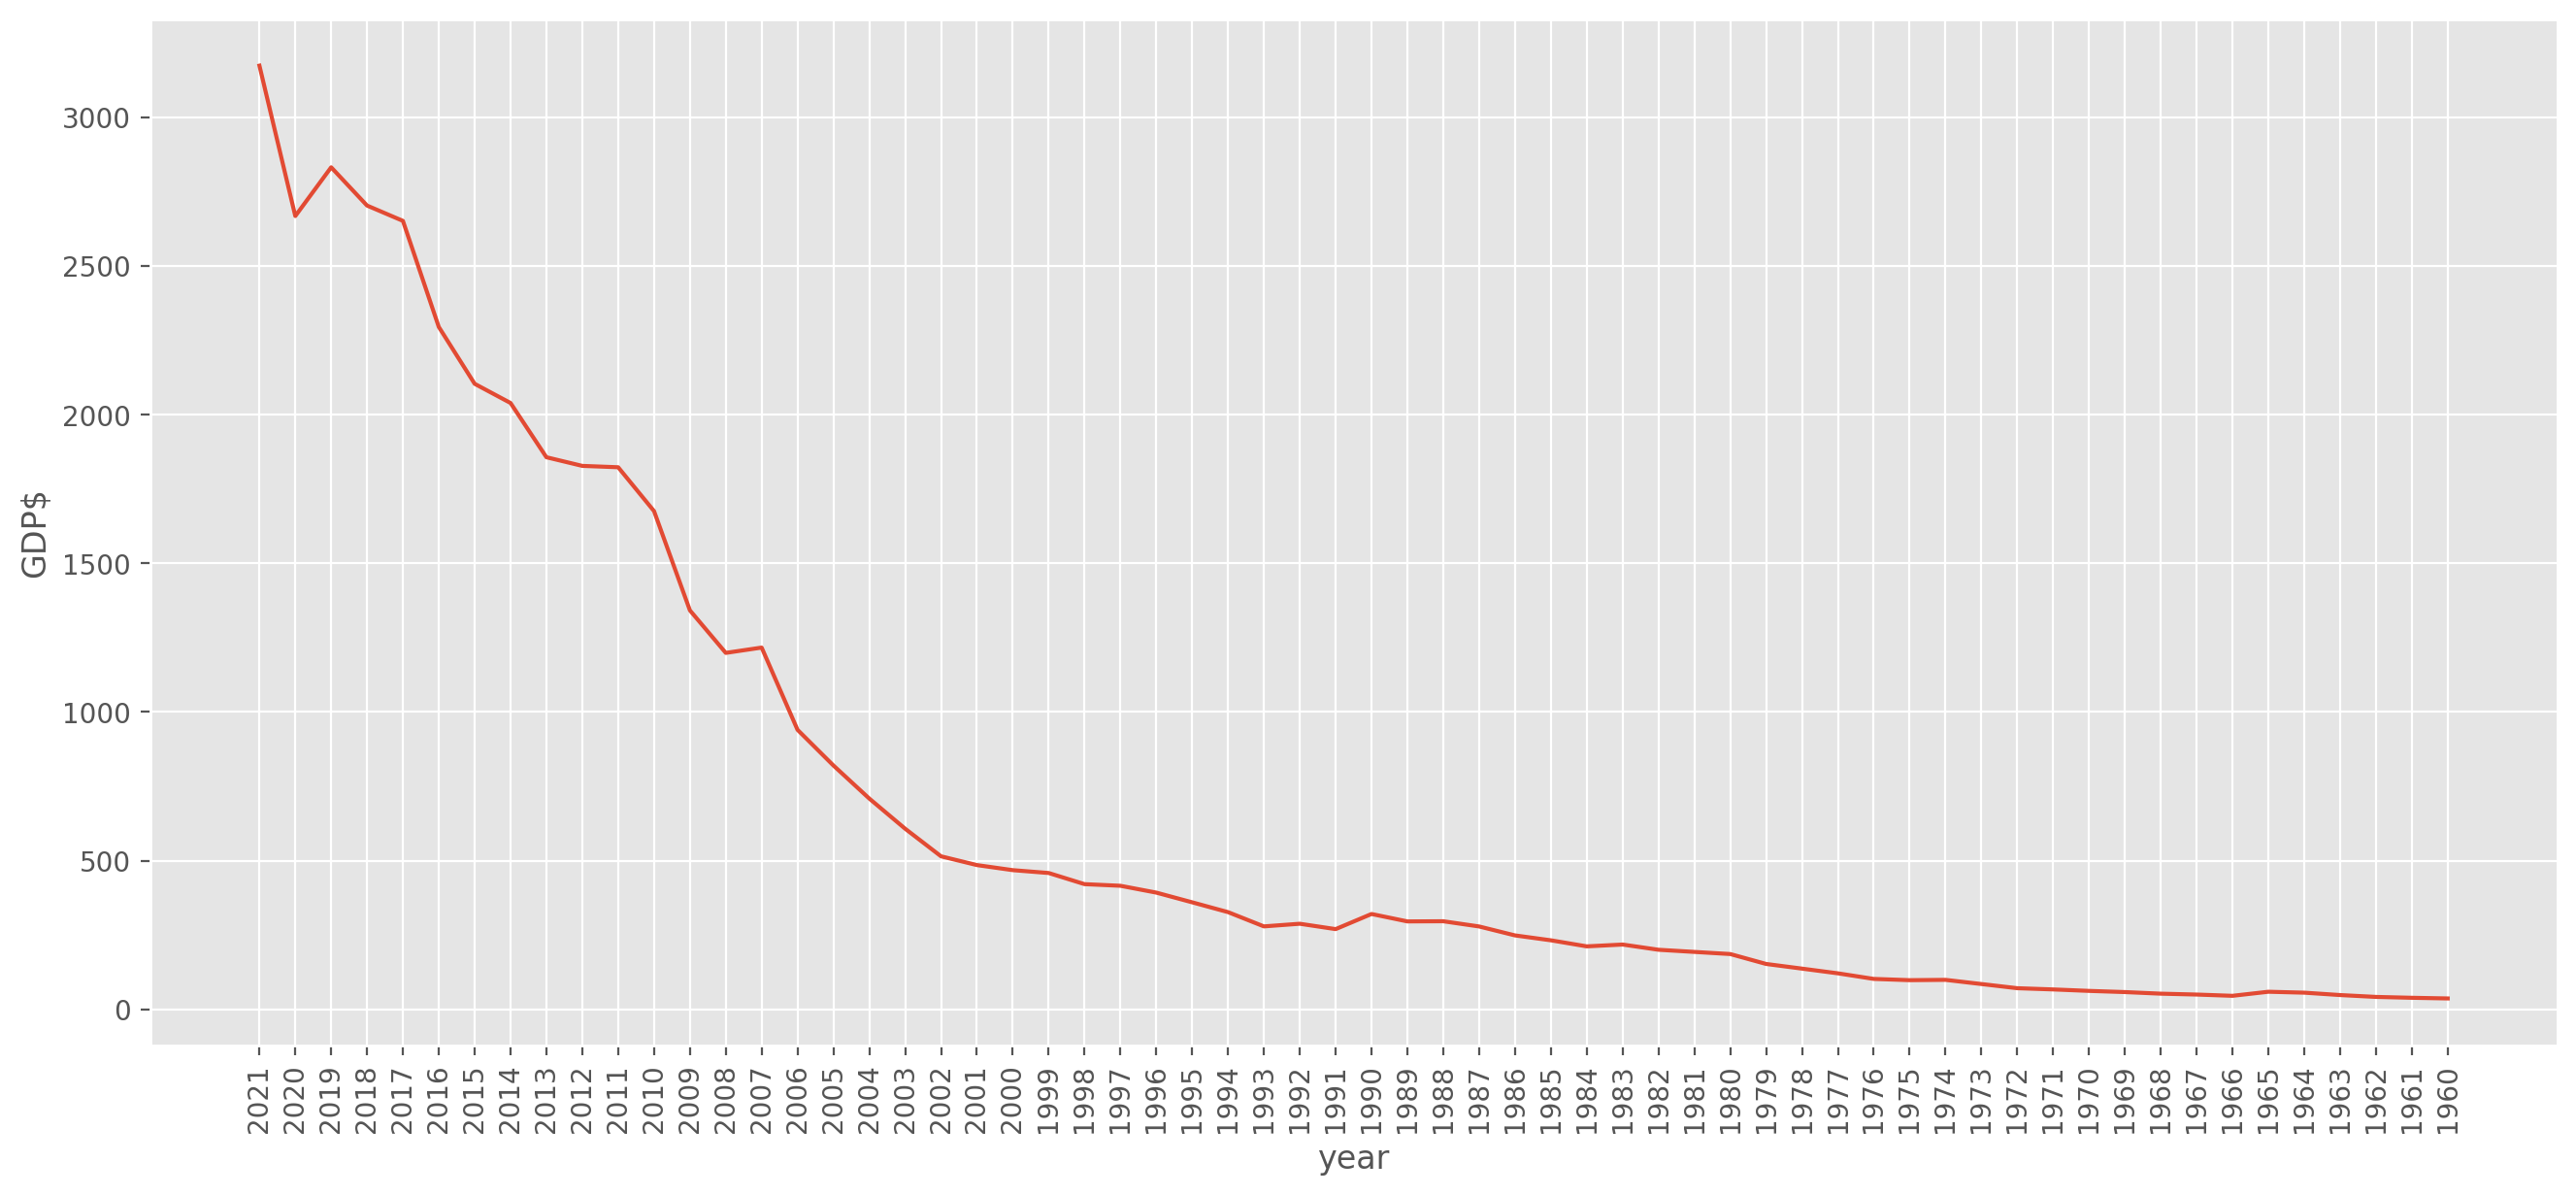

In [22]:
plt.figure(figsize = (16,7), dpi = 200)
plt.xticks(rotation = 90)
sns.lineplot(y = df['GDP$'], x = df.year)

<AxesSubplot:>

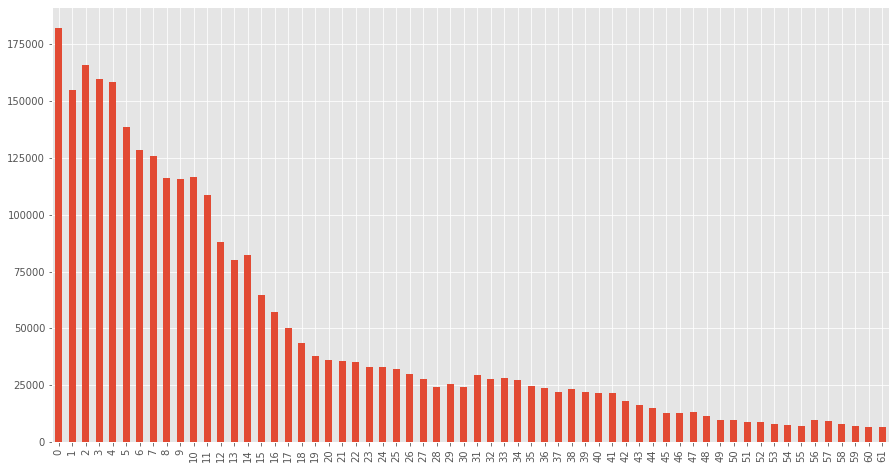

In [24]:
df["Per_capita$"].plot(kind="bar",figsize=(15,8))

In [25]:
cols_to_scale = ['GDP$', 'Growth%', 'Per_capita$']

#create and fit scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[cols_to_scale])

#scale selected data
df[cols_to_scale] = scaler.transform(df[cols_to_scale])

In [27]:
df[cols_to_scale]

,GDP$,Growth%,Per_capita$
0,2.876478,1.197545,2.734405
1,2.288584,-3.525519,2.172621
2,2.479074,-0.384909,2.399621
3,2.329551,0.438210,2.278772
4,2.269728,0.544517,2.251009
...,...,...,...
57,-0.746980,0.741944,-0.794711
58,-0.756350,0.298492,-0.819207
59,-0.763627,-0.630934,-0.837171
60,-0.767033,-0.390984,-0.845337


In [28]:
df

,index,year,GDP$,Per_capita$,Growth%
0,1,2021,2.876478,2.734405,1.197545
1,2,2020,2.288584,2.172621,-3.525519
2,3,2019,2.479074,2.399621,-0.384909
3,4,2018,2.329551,2.278772,0.438210
4,5,2017,2.269728,2.251009,0.544517
...,...,...,...,...,...
57,58,1964,-0.746980,-0.794711,0.741944
58,59,1963,-0.756350,-0.819207,0.298492
59,60,1962,-0.763627,-0.837171,-0.630934
60,61,1961,-0.767033,-0.845337,-0.390984


In [29]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[["year"]])
df[["year"]] = enc.transform(df[["year"]])

In [30]:
df

,index,year,GDP$,Per_capita$,Growth%
0,1,61.0,2.876478,2.734405,1.197545
1,2,60.0,2.288584,2.172621,-3.525519
2,3,59.0,2.479074,2.399621,-0.384909
3,4,58.0,2.329551,2.278772,0.438210
4,5,57.0,2.269728,2.251009,0.544517
...,...,...,...,...,...
57,58,4.0,-0.746980,-0.794711,0.741944
58,59,3.0,-0.756350,-0.819207,0.298492
59,60,2.0,-0.763627,-0.837171,-0.630934
60,61,1.0,-0.767033,-0.845337,-0.390984


<AxesSubplot:>

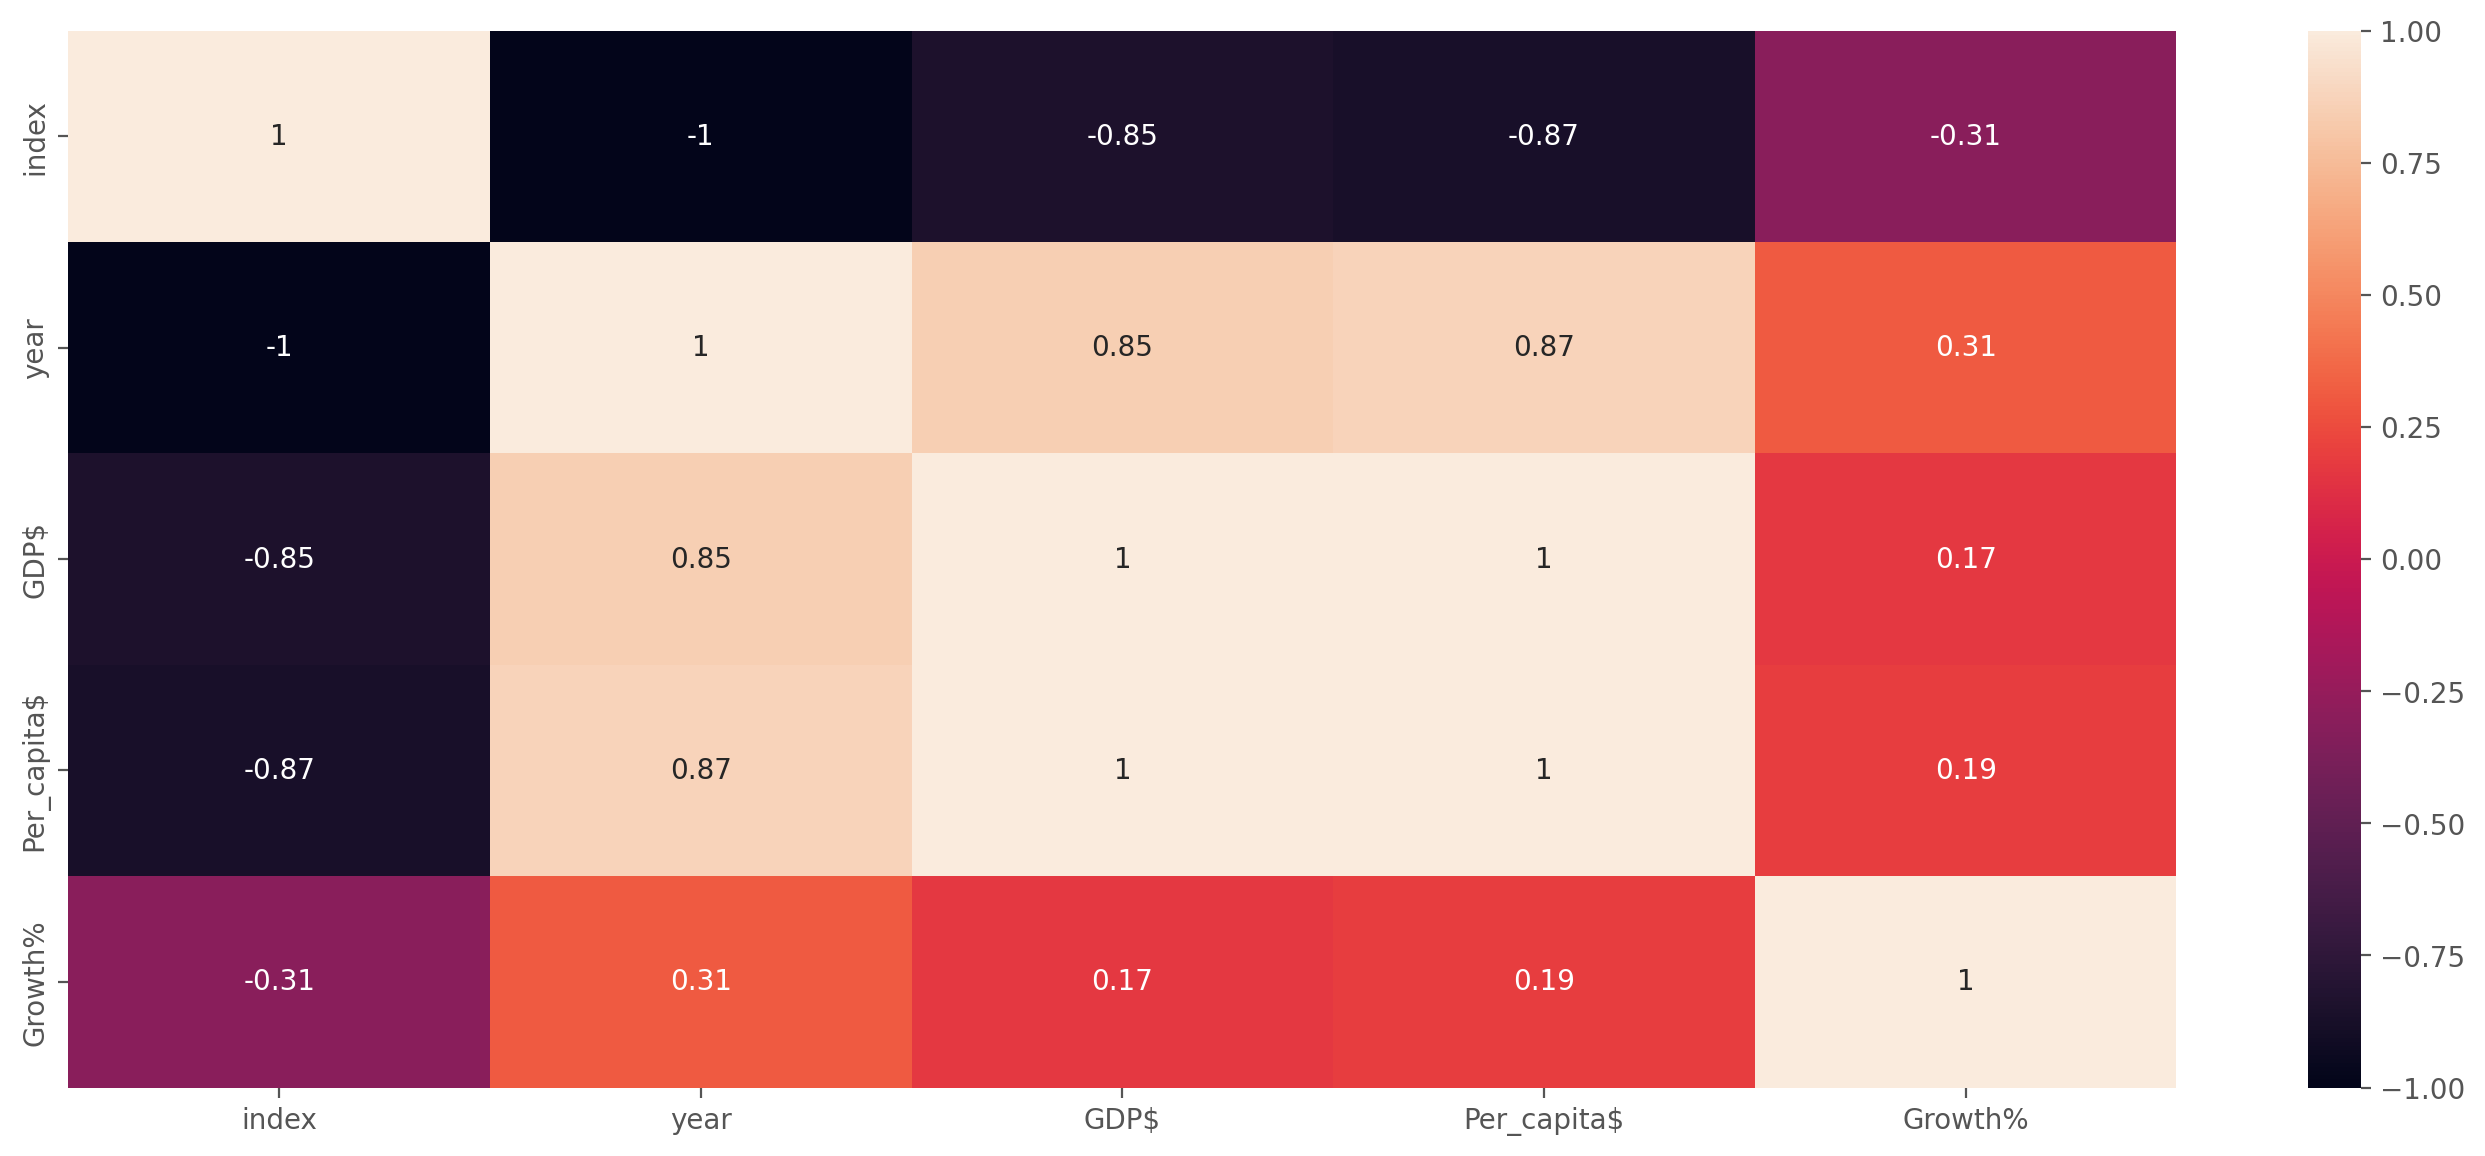

In [31]:
plt.figure(figsize = (17,7), dpi=200)
sns.heatmap(df.corr(), annot = True)

In [32]:
X = df[['year', 'Growth%']]
Y = df[['GDP$']]

In [33]:
X = X[['year', 'Growth%']].values
Y = Y[['GDP$']].values

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 2)

# KNN regression model Training

In [35]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train, y_train)

KNeighborsRegressor()

In [36]:
print('Training Set Score : ', knn_reg.score(x_train, y_train))
print('Testing Set Score  : ', knn_reg.score(x_test, y_test))

Training Set Score :  0.9905429126695321
Testing Set Score  :  0.9677815228532646


# Finding Best Value for KNN

In [37]:
acc_train = []
acc_test  = []

for i in range(1,21):
    regressor = KNeighborsRegressor(n_neighbors = i)
    regressor.fit(x_train, y_train)
    
    acc_train.append(regressor.score(x_train, y_train))
    acc_test.append(regressor.score(x_test, y_test))

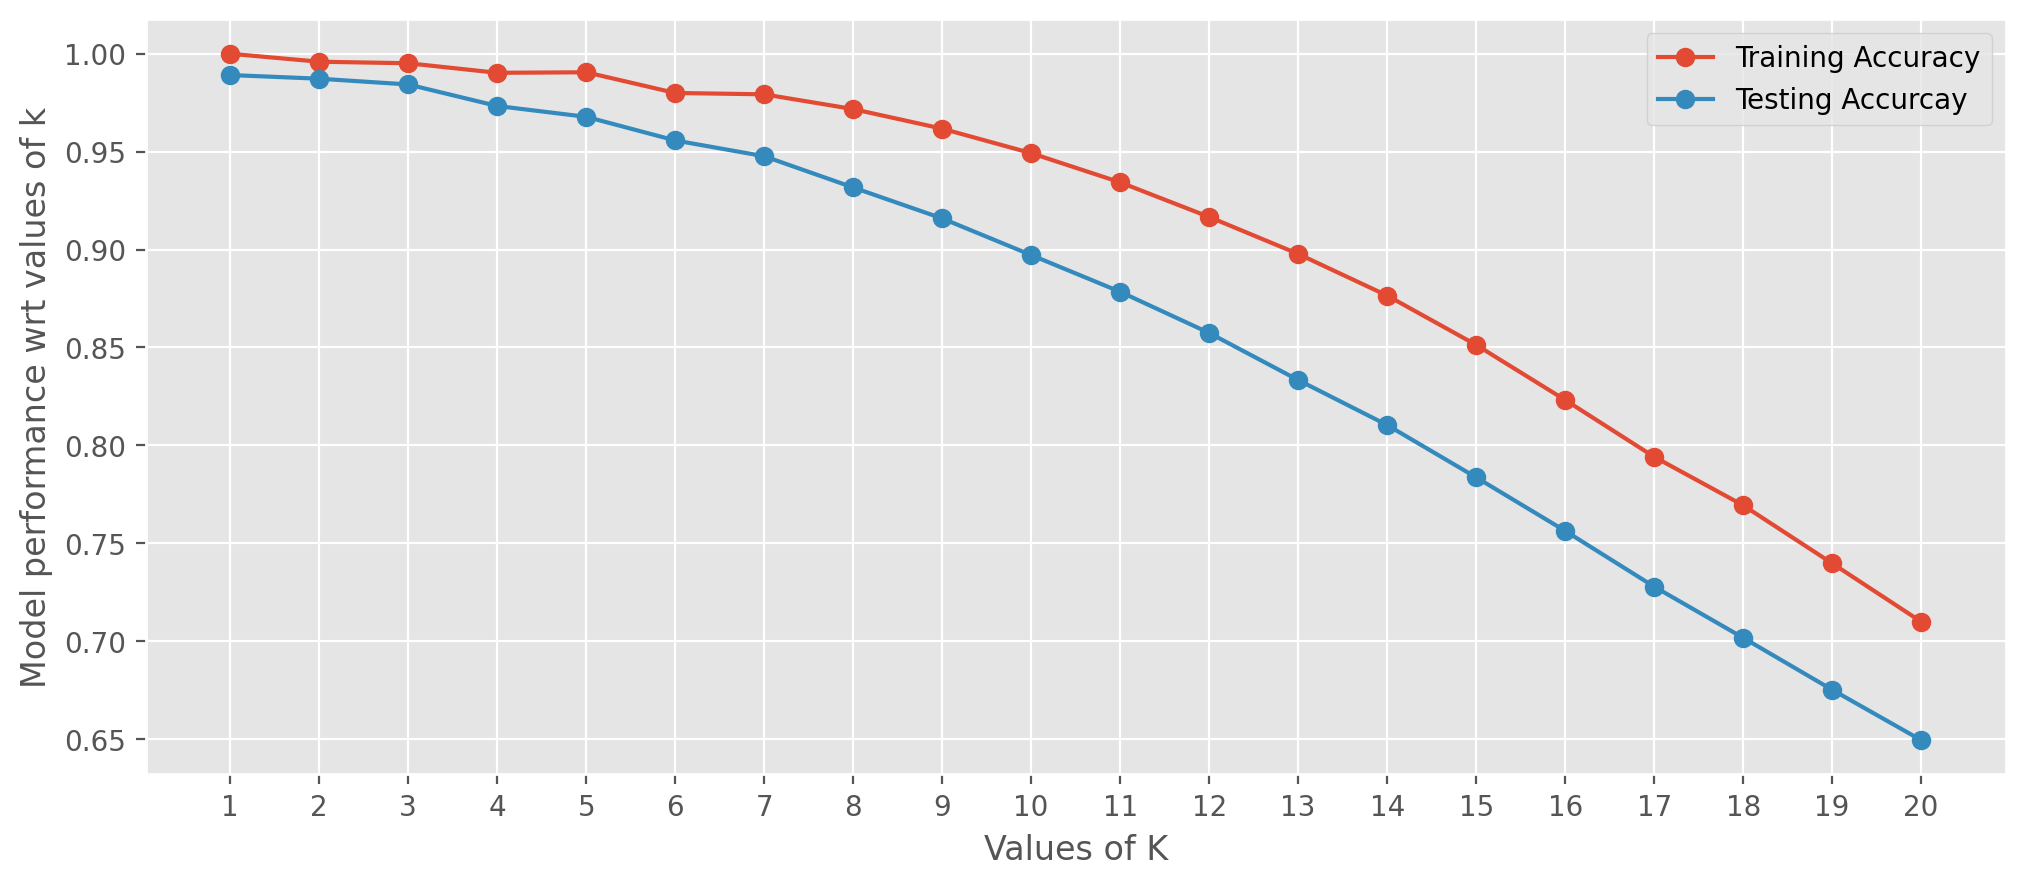

In [38]:
x = x = list(range(1,21))

plt.figure(figsize = (12,5), dpi = 200)
plt.plot(x, acc_train, '-o', label = 'Training Accuracy')
plt.plot(x, acc_test,  '-o', label = 'Testing Accurcay')

plt.xticks(x)
plt.xlabel('Values of K')
plt.ylabel('Model performance wrt values of k')
plt.legend()

In [39]:
regressor = KNeighborsRegressor(n_neighbors = 2)
regressor.fit(x_train, y_train)

print('Training Set Accuracy : ', regressor.score(x_train, y_train))
print('Testing Set Accuracy  : ', regressor.score(x_test, y_test))

Training Set Accuracy :  0.9959361604037266
Testing Set Accuracy  :  0.9872621150359326


For this model the Best value for neighbors for KNN regression is 2